Group Members:

TIffany Huang A11866551

Katie Lau A91045835

Vanessa Chou A12114407

Luis Llobrera A12034606

Contributions:

Tiffany:

Katie:

Vanessa:

Luis:

Introduction and Background

The "Predict'em All" dataset on Kaggle is comprised of nearly 300,000 Pokemon sightings in the augmented reality game Pokemon Go. It records the spawning logistics of 150 different kinds of Pokemon from “Kanto”, a region comprised of several cities, routes, and other landmarks. As outlined in our project proposal, we hypothesized that mapping from Kanto onto the real world was performed during the production of this game, and so Pokemon should spawn semi-realistically in Pokemon GO as they did in the Pokemon series. Specifically, we used game data from the Gold and Silver Pokemon games as a basis to perform comparisons and analysis on the Kaggle dataset. By analyzing the spawn frequency in regards to geographical (continent, urban/rural proximity) and time-of-day conditions, we observed whether Pokemon Go’s spawning behavior was 75% accurate to the Gold and Silver games.

Data Description

The data we used is pulled from two sources: the Predict'em All Kaggle dataset that records sightings in Pokemon Go and the appearance data from the Gold and Silver games released in 1999. Our primary Kaggle dataset included many features for each sighting and some were eventually ommitted in our comparison of the two games, such as longitude and lattitude comparisons. Despite being an older set of games, Gold and Silver is also based on Kanto and had simple time-of-day features such as differences in pokemon spawn patterns between day and night. In addition, Gold and Silver's game map is divided into routes and locations such as caves and islands, which we used in our analysis of urban and rural spawn patterns.

Data Cleaning/Pre-processing

We cleaned both datasets by isolating the columns of data we deemed relevant to our hypothesis; we then imported them into separate dataframes. Below is the code for these steps. 

IMPORTS & GLOBAL VARS

In [194]:
import requests
import bs4
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

urban=['kanto-route-1','kanto-route-2', 'kanto-route-3','kanto-route-4','kanto-route-5','kanto-route-6','kanto-route-7','kanto-route-8','kanto-route-9','kanto-route-10','kanto-route-11','kanto-route-15','kanto-route-16','kanto-route-18','kanto-route-22','kanto-route-24', 'kanto-bond-bridge', 'kanto-celadon-city', 'kanto-cerulean-city', 'kanto-cinnabar-island', 'kanto-fuchsia-city', 'kanto-kindle-road', 'kanto-pallet-town', 'kanto-pewter-city', 'kanto-pokemon-mansion', 'kanto-pokemon-tower', 'kanto-power-plant', 'kanto-resort-gorgeous', 'kanto-safari-zone', 'kanto-saffron-city', 'kanto-silph-co', 'kanto-three-isle-port', 'kanto-trainer-tower', 'kanto-treasure-beach', 'kanto-vermilion-city', 'kanto-victory-road', 'kanto-viridian-city', 'kanto-viridian-forest']
rural=['kanto-route-12','kanto-route-13','kanto-route-14','kanto-route-17','kanto-route-19','kanto-route-20','kanto-route-21','kanto-route-23','kanto-route-25','kanto-route-26','kanto-route-27','kanto-route-28', 'kanto-berry-forest', 'kanto-canyon-entrance', 'kanto-cerulean-cave', 'kanto-cape-brink', 'kanto-digletts-cave', 'kanto-five-island', 'kanto-five-isle-meadow', 'kanto-four-island', 'kanto-green-path', 'kanto-icefall-cave', 'kanto-lost-cave', 'kanto-memorial-pillar', 'kanto-mt-ember', 'kanto-mt-moon', 'kanto-one-island', 'kanto-outcast-island', 'kanto-pattern-bush', 'kanto-rock-tunnel', 'kanto-ruin-valley', 'kanto-seafoam-islands', 'kanto-seavault-canyon', 'kanto-tanoby-ruins', 'kanto-tohjo-falls', 'kanto-water-labyrinth', 'kanto-water-path']
pokeNames = ['', 'bulbasaur', 'ivysaur', 'venusaur', 'charmander', 'charmeleon', 'charizard', 'squirtle', 'wartortle', 'blastoise', 'caterpie', 'metapod', 'butterfree', 'weedle', 'kakuna', 'beedrill', 'pidgey', 'pidgeotto', 'pidgeot', 'rattata', 'raticate', 'spearow', 'fearow', 'ekans', 'arbok', 'pikachu', 'raichu', 'sandshrew', 'sandslash', 'nidoran', 'nidorina', 'nidoqueen', 'nidoran', 'nidorino', 'nidoking', 'clefairy', 'vulpix', 'ninetales', 'jigglypuff', 'wigglytuff', 'zubat', 'golbat', 'oddish', 'gloom', 'vileplume', 'paras', 'parasect', 'venonat', 'venemoth', 'diglett', 'dugtrio', 'meowth', 'persian', 'psyduck', 'golduck', 'mankey', 'primeape', 'growlithe', 'arcanine', 'poliwag', 'poliwhirl', 'poliwrath', 'abra', 'kadabra', 'alakazam', 'machop', 'machoke', 'machamp', 'bellsprout', 'weepinbell', 'victreebel', 'tentacool', 'tentacruel', 'geodude', 'graveler', 'golem', 'ponyta', 'rapidash', 'slowpoke', 'slowbro', 'magnemite', 'magnetron', 'farfetchd', 'doduo', 'dodrio', 'seel', 'dewgong', 'grimer', 'muk', 'shellder', 'cloyster', 'gastly', 'haunter', 'gengar', 'onix', 'drowzee', 'hypno', 'krabby', 'kingler', 'voltorb', 'electrode', 'exeggcute', 'exeggutor', 'cubone', 'marowak', 'hitmonlee', 'hitmonchan', 'lickitung', 'koffing', 'weezing', 'rhyhorn', 'rhydon', 'chansey', 'tangela', 'kangaskhan', 'horsea', 'seadra', 'goldeen', 'seaking', 'staryu', 'starmie', 'mrmime', 'scyther', 'jynx', 'electabuzz', 'magmar', 'pinsir', 'tauros', 'magikarp', 'gyarados', 'lapras', 'ditto', 'eevee', 'vaporeon', 'jolteon', 'flareon', 'porygon', 'omanyte', 'omastar', 'kabuto', 'kabutops', 'aerodactyl', 'snorlax', 'articuno', 'zapdos', 'moltres', 'dratini', 'dragonair', 'dragonite', 'mewtwo', 'mew']

SCRAPE POKEMON LOCATION GUIDE DATA (FROM WEBSITE)

In [195]:
"""
get generation 2 spawn tables
"""

def get_spawn_tables(loc):
    """
    params:
    -------
        loc - url to search through 
    rets:
    -----
        res - generation 2 spawn tables scraped from loc url
    """
    
    loc_page = requests.get(loc)
    loc_soup = BeautifulSoup(loc_page.content, 'html.parser')
    
    # extract html between header tags
    start = loc_soup.find('h2', {'id': 'gen2'})
    html  = u''
    res   = []
    
    if (start is None):
        return []
    
    for elem in start.next_siblings:
        if elem.name == 'h2':
            break
        else:
            html += str(elem)

    soup   = BeautifulSoup(html, 'html.parser')
    tables = soup.find_all('table', {'class': 'data-table'})
    catch_methods = soup.find_all('h3')
    
    for i in range(len(tables)):
        res.append(tuple([loc[31:], catch_methods[i].text, tables[i]]))
        
    return res

In [196]:
"""
parse spawn table row
"""
def parse_spawn_table_row(row):
    """
    params:
    -------
        row - row to parse
    rets:
    -----
        res - tuple of the form [pokemon name | times available]
    """
    
    name         = row.find('td').find('span', {'class': 'infocard-data'}).find('a')['href'][9:]
    availability = []
    iterator     = 0
    times        = ['morning', 'day', 'night']
    
    for elem in row.find('td', {'class': 'cell-fixed'}).contents:
        if elem.name == 'img':
            availability.append(times[iterator])
            
        iterator += 1
        
    return tuple([name, availability])
    

In [197]:
"""
parse a single spawn table
"""

def parse_spawn_table(table):
    """
    params:
    -------
        table - table to parse. tuple (route, catch method, data table)
    rets:
    -----
        res - 2d matrix where each row is of form [pokemon name | routes available | times available | catch method]
    """
    
    route          = table[0]
    catch_method   = table[1]
    names          = []
    availabilities = []
    res            = []
    
    for row in table[2].find_all('tr')[1:]:
        name, availability = parse_spawn_table_row(row)
        names.append(name)
        availabilities.append(availability)
        
    for i in range(len(names)):
        res.append([names[i], route, availabilities[i], catch_method])
        
    return res

In [198]:
"""
parse all spawn tables
"""

def parse_spawn_tables():
    """
    params:
    -------
        NONE (relies on global var 'tables')
    rets:
    ----
         res - 2d matrix where each row is of form [pokemon name | routes available | times available | catch method]
    """
    
    res = []
    
    for table in tables:
        res += parse_spawn_table(table)
        
    return res

In [199]:
"""
union duplicate pokemon data
"""

def union_pokemon_guide():
    """
    params:
    -------
        NONE (relies on global var 'pokemon_location_guide')
    rets:
    -----
        res - unioned pokemon location guide (i.e. dupe pokemon have data unioned(?))
    """
    
    res   = []
    names = get_names()
    
    f_name   = ''
    f_routes = []
    f_catch  = []
    f_times  = [["morning", 0], ["day", 0], ["night", 0]]
    
    for name in names:
        
        to_union = [x for x in pokemon_location_guide if x[0] == name]
        f_name   = name
        f_routes = sorted(list(set([x[1] for x in to_union])))
        f_catch  = sorted(list(set([x[3] for x in to_union])))
        f_times  = [["morning", 0], ["day", 0], ["night", 0]]

        for data in to_union:
            for time in data[2]:
                if time == 'morning':
                    f_times[0][1] += 1
                elif time == 'day':
                    f_times[1][1] += 1
                elif time == 'night':
                    f_times[2][1] += 1
        
        for i in range(len(f_times)):
            f_times[i] = tuple(f_times[i])
                    
        res.append([f_name, f_routes, f_times, f_catch])
        
    return res
            

In [200]:
"""
get all available pokemon names
"""

def get_names():
    """
    params:
    -------
        NONE (relies on global var 'pokemon_location_guide')
    rets:
    -----
        res - all pokemon names available
    """
    
    res = []
    
    for poke_data in pokemon_location_guide:
        res.append(poke_data[0])
        
    return sorted(list(set(res)))
    

In [201]:
"""
base url
"""
base_url = 'https://pokemondb.net/location'
page     = requests.get(base_url)
soup     = BeautifulSoup(page.content, 'html.parser')
poke_df  = pd.DataFrame(columns=['routes available', 'time of day', 'capture method'], dtype='object')

In [202]:
"""
load route urls into locs
"""
locs = []
loc  = ''

for a in soup.find_all('a', href=re.compile(r'/location/kanto')):
    to_append     = a['href'][9:]
    loc  = base_url + to_append
    locs.append(loc)

In [203]:
"""
load generation 2 tables from each url
"""
tables = []

for loc in locs:
    tables += (get_spawn_tables(loc))

In [204]:
"""
parse loaded tables and put into 2d matrix (non-numpy)
"""
pokemon_location_guide = parse_spawn_tables()
pokemon_location_guide = sorted(pokemon_location_guide, key=lambda x: x[0])
pokemon_location_guide = union_pokemon_guide()

In [205]:
"""
flip generated 2d matrix for df generation
"""
to_df = list(zip(*reversed(pokemon_location_guide)))

In [206]:
"""
generate pandas dataframe
"""
pokemon_location_guide_d  = {'Pokemon': to_df[0], 'Routes Available': to_df[1], 'Times Available': to_df[2], 'Capture Methods': to_df[3]}
pokemon_location_guide_df = pd.DataFrame(pokemon_location_guide_d)
pokemon_location_guide_df.set_index('Pokemon', inplace=True)
"""
remove rows with pokemon that are not a part of the original 150 species
"""
pokemon_location_guide_df.reset_index(level=0, inplace=True)
pokemon_location_guide_df = pokemon_location_guide_df.loc[pokemon_location_guide_df['Pokemon'].isin(pokeNames)]
pokemon_location_guide_df = pokemon_location_guide_df.loc[pokemon_location_guide_df['Pokemon'] != 'bellsprout']
pokemon_location_guide_df.set_index('Pokemon', inplace=True)
pokemon_location_guide_df

,Capture Methods,Routes Available,Times Available
Pokemon,,,
zubat,[Walking],"[kanto-route-10, kanto-route-3, kanto-route-4,...","[(morning, 1), (day, 1), (night, 7)]"
weepinbell,[Walking],"[kanto-route-24, kanto-route-25]","[(morning, 2), (day, 2), (night, 2)]"
weedle,"[Headbutt, Headbutt (Special)]","[kanto-route-26, kanto-route-27]","[(morning, 4), (day, 4), (night, 4)]"
vulpix,[Walking],"[kanto-route-7, kanto-route-8]","[(morning, 2), (day, 2), (night, 2)]"
voltorb,[Walking],[kanto-route-10],"[(morning, 1), (day, 1), (night, 1)]"
venonat,[Walking],"[kanto-route-10, kanto-route-13, kanto-route-1...","[(morning, 2), (day, 0), (night, 8)]"
tentacruel,"[Super Rod, Surfing]","[kanto-cinnabar-island, kanto-pallet-town, kan...","[(morning, 12), (day, 12), (night, 12)]"
tentacool,"[Good Rod, Old Rod, Super Rod, Surfing]","[kanto-cinnabar-island, kanto-pallet-town, kan...","[(morning, 21), (day, 21), (night, 21)]"
tangela,[Walking],"[kanto-route-21, kanto-route-28]","[(morning, 3), (day, 3), (night, 3)]"


START KAGGLE DATA

In [207]:
#read in file only with certain columns that we need
fields = ['pokemonId', 'appearedHour', 'closeToWater', 'city', 'weather', 'weatherIcon', 'urban', 'midurban', 'suburban', 'rural']
df = pd.read_csv('./data/300k.csv', skipinitialspace=True, usecols=fields)

In [208]:
#convert pokemonId to pokemon name - note: farfetch'd = farfetchd, mr. mime = mrmime

def idToName(pokeId): 
    index = int(pokeId)
    return pokeNames[index]

df['pokemonName'] = df['pokemonId'].apply(idToName)

In [209]:
#remove rows with pokemon not in scrapped data
pokeList = pokemon_location_guide_df.index.values
df = df.loc[df['pokemonName'].isin(pokeList)]

In [210]:
#convert appearedHour to time of day to match scraped data
def timeConvert(hour):
    if(hour >= 4 and hour < 10):
        return 'morning'
    elif(hour >= 10 and hour < 18):
        return 'day'
    else:
        return 'night'

df['appearedTimeOfDay'] = df['appearedHour'].apply(timeConvert)

In [211]:
df

,pokemonId,appearedHour,closeToWater,city,weather,weatherIcon,urban,suburban,midurban,rural,pokemonName,appearedTimeOfDay
0,16,5,False,Mexico_City,Foggy,fog,True,True,True,False,pidgey,morning
2,16,5,False,New_York,Clear,clear-night,False,True,True,False,pidgey,morning
3,13,5,True,Los_Angeles,PartlyCloudy,partly-cloudy-night,True,True,True,False,weedle,morning
5,21,5,False,Perth,PartlyCloudy,partly-cloudy-day,True,True,True,False,spearow,morning
7,27,5,False,Chicago,Clear,clear-night,True,True,True,False,sandshrew,morning
8,35,5,False,Mexico_City,Foggy,fog,True,True,True,False,clefairy,morning
9,19,5,False,New_York,Clear,clear-night,False,False,False,True,rattata,morning
12,16,5,False,Chicago,Clear,clear-night,True,True,True,False,pidgey,morning
13,19,5,False,Mexico_City,Foggy,fog,True,True,True,False,rattata,morning
14,19,5,False,Chicago,Clear,clear-night,True,True,True,False,rattata,morning


In [212]:
#dictionary of name: (# of morning appearances, day, night) 
pokeTimes = {}

for i, row in df.iterrows():
    name = row['pokemonName']
    time = row['appearedTimeOfDay']
    if name in pokeTimes:
        m, d, n = pokeTimes[name]
        if(time == 'morning'):
            pokeTimes[name] = (m+1, d, n)
        if(time == 'day'):
            pokeTimes[name] = (m, d+1, n)
        if(time == 'night'):
            pokeTimes[name] = (m, d, n+1)
    else:
        if(time == 'morning'):
            pokeTimes[name] = (1, 0, 0)
        if(time == 'day'):
            pokeTimes[name] = (0, 1, 0)
        if(time == 'night'):
            pokeTimes[name] = (0, 0, 1)   


In [213]:
#dictionary of name: time of day with most appearances
pokeTimeOfDay = {}
for pokemon, (m, d, n) in pokeTimes.items():
    if(m > d and m > n):
        pokeTimeOfDay[pokemon] = 'morning'
    elif(d > m and d > n):
        pokeTimeOfDay[pokemon] = 'day'
    elif(n > m and n > d):
        pokeTimeOfDay[pokemon] = 'night'
    elif(m == d):
        if(m == n):
            pokeTimeOfDay[pokemon] = 'morning, day, night'
        else: 
            pokeTimeOfDay[pokemon] = 'morning, day'
    elif(m == n):
        pokeTimeOfDay[pokemon] = 'morning, night'
    elif(d == n):
        pokeTimeOfDay[pokemon] = 'day, night'
    
print(pokeTimeOfDay)

{'pidgey': 'night', 'weedle': 'night', 'spearow': 'night', 'sandshrew': 'night', 'clefairy': 'night', 'rattata': 'night', 'gyarados': 'night', 'ekans': 'night', 'golbat': 'night', 'poliwhirl': 'night', 'kingler': 'night', 'pidgeotto': 'night', 'beedrill': 'night', 'kadabra': 'night', 'marowak': 'night', 'persian': 'night', 'primeape': 'night', 'caterpie': 'night', 'kakuna': 'night', 'hypno': 'night', 'weepinbell': 'night', 'magikarp': 'night', 'metapod': 'night', 'golduck': 'night', 'rapidash': 'night', 'oddish': 'night', 'tentacruel': 'night', 'gloom': 'night', 'drowzee': 'night', 'seaking': 'night', 'haunter': 'night', 'tangela': 'morning', 'poliwag': 'night', 'muk': 'night', 'exeggcute': 'night', 'abra': 'morning, day, night', 'krabby': 'day, night', 'fearow': 'night', 'dodrio': 'night', 'staryu': 'day', 'electabuzz': 'night', 'magnemite': 'day', 'raticate': 'night', 'venonat': 'night', 'butterfree': 'night', 'nidorina': 'night', 'arbok': 'night', 'nidorino': 'night', 'psyduck': 'mo

In [214]:
#number of appearances in urban vs rural
urbanAppearances = 0
ruralAppearances = 0

for i, row in df.iterrows():
    if(row['urban']):
        urbanAppearances+= 1
    elif(row['midurban']):
        urbanAppearances+= 1
    elif(row['suburban']):
        urbanAppearances+= 1
    else:
        ruralAppearances+= 1

print(str(urbanAppearances) + ", " + str(ruralAppearances))

160755, 66259


In [215]:
#number of appearances in urban vs rural per pokemon
#dictionary of name: (urban appearances, rural)
pokePlace = {}
for i, row in df.iterrows():
    name = row['pokemonName']
    if name in pokePlace:
        u, r = pokePlace[name]
        if(row['urban']):
            pokePlace[name] = (u+1, r)
        elif(row['midurban']):
            pokePlace[name] = (u+1, r)
        elif(row['suburban']):
            pokePlace[name] = (u+1, r)
        else:
            pokePlace[name] = (u, r+1)
    else:
        if(row['urban']):
            pokePlace[name] = (1, 0)
        elif(row['midurban']):
            pokePlace[name] = (1, 0)
        elif(row['suburban']):
            pokePlace[name] = (1, 0)
        else:
            pokePlace[name] = (0, 1)
            
print(pokePlace)

{'pidgey': (36488, 15626), 'weedle': (17860, 9507), 'spearow': (9051, 3286), 'sandshrew': (1580, 445), 'clefairy': (2599, 966), 'rattata': (27044, 12593), 'gyarados': (5639, 2299), 'ekans': (3299, 848), 'golbat': (7671, 2472), 'poliwhirl': (2929, 968), 'kingler': (3470, 1168), 'pidgeotto': (2346, 944), 'beedrill': (127, 72), 'kadabra': (989, 371), 'marowak': (700, 230), 'persian': (1294, 463), 'primeape': (1465, 447), 'caterpie': (6739, 3115), 'kakuna': (1213, 594), 'hypno': (8465, 2040), 'weepinbell': (2319, 1149), 'magikarp': (525, 145), 'metapod': (409, 187), 'golduck': (2829, 1121), 'rapidash': (830, 380), 'oddish': (801, 234), 'tentacruel': (746, 407), 'gloom': (2366, 1237), 'drowzee': (163, 42), 'seaking': (2886, 956), 'haunter': (1865, 554), 'tangela': (16, 6), 'poliwag': (24, 8), 'muk': (102, 36), 'exeggcute': (17, 17), 'abra': (4, 8), 'krabby': (261, 57), 'fearow': (286, 107), 'dodrio': (423, 128), 'staryu': (110, 42), 'electabuzz': (646, 109), 'magnemite': (44, 15), 'raticate

In [216]:
#for each pokemon, urban/rural appearances
pokeRatio = {}
for pokemon, (u, r) in pokePlace.items():
    if(r == 0):
        pokeRatio[pokemon] = 0
    else:
        pokeRatio[pokemon] = u/(u+r)
        
print(pokeRatio)        

{'pidgey': 0.700157347353878, 'weedle': 0.6526108086381408, 'spearow': 0.7336467536678285, 'sandshrew': 0.7802469135802469, 'clefairy': 0.7290322580645161, 'rattata': 0.6822917980674622, 'gyarados': 0.7103804484756866, 'ekans': 0.7955148299975886, 'golbat': 0.7562851227447501, 'poliwhirl': 0.7516037977931742, 'kingler': 0.7481673134971971, 'pidgeotto': 0.7130699088145896, 'beedrill': 0.6381909547738693, 'kadabra': 0.7272058823529411, 'marowak': 0.7526881720430108, 'persian': 0.736482640865111, 'primeape': 0.766213389121339, 'caterpie': 0.6838847168662472, 'kakuna': 0.6712783619258439, 'hypno': 0.8058067586863399, 'weepinbell': 0.6686851211072664, 'magikarp': 0.7835820895522388, 'metapod': 0.6862416107382551, 'golduck': 0.7162025316455696, 'rapidash': 0.6859504132231405, 'oddish': 0.7739130434782608, 'tentacruel': 0.6470078057241977, 'gloom': 0.6566749930613378, 'drowzee': 0.7951219512195122, 'seaking': 0.7511712649661635, 'haunter': 0.7709797436957421, 'tangela': 0.7272727272727273, 'p

In [217]:
#pokemon that appear more often in urban/rural
urbanPokemon = []
ruralPokemon = []

for pokemon, (u, r) in pokePlace.items():
    if(u > r):
        urbanPokemon.append(pokemon)
    elif(r > u):
        ruralPokemon.append(pokemon)

print(str(urbanPokemon) + '\n\n' + str(ruralPokemon))

['pidgey', 'weedle', 'spearow', 'sandshrew', 'clefairy', 'rattata', 'gyarados', 'ekans', 'golbat', 'poliwhirl', 'kingler', 'pidgeotto', 'beedrill', 'kadabra', 'marowak', 'persian', 'primeape', 'caterpie', 'kakuna', 'hypno', 'weepinbell', 'magikarp', 'metapod', 'golduck', 'rapidash', 'oddish', 'tentacruel', 'gloom', 'drowzee', 'seaking', 'haunter', 'tangela', 'poliwag', 'muk', 'krabby', 'fearow', 'dodrio', 'staryu', 'electabuzz', 'magnemite', 'raticate', 'venonat', 'butterfree', 'nidorina', 'arbok', 'nidorino', 'psyduck', 'growlithe', 'voltorb', 'mankey', 'sandslash', 'vulpix', 'goldeen', 'meowth', 'shellder', 'slowpoke', 'grimer', 'chansey', 'tentacool', 'doduo', 'zubat', 'ponyta', 'jigglypuff', 'aerodactyl']

['abra']


In [218]:
#total appearances of each pokemon
pokeAppearances = {}
for i, row in df.iterrows():
    name = row['pokemonName']
    if name in pokeAppearances:
        pokeAppearances[name] = pokeAppearances[name] + 1
    else:
        pokeAppearances[name] = 1

In [219]:
#sorted by least to most appearances
pokeAppearancesSorted = sorted(pokeAppearances.items(), key=lambda x: x[1])
print(pokeAppearancesSorted)

[('doduo', 1), ('shellder', 5), ('aerodactyl', 5), ('jigglypuff', 8), ('abra', 12), ('tentacool', 19), ('ponyta', 20), ('tangela', 22), ('meowth', 25), ('zubat', 25), ('grimer', 28), ('psyduck', 29), ('poliwag', 32), ('exeggcute', 34), ('slowpoke', 41), ('chansey', 43), ('sandslash', 56), ('magnemite', 59), ('growlithe', 60), ('vulpix', 64), ('goldeen', 84), ('butterfree', 95), ('mankey', 131), ('muk', 138), ('arbok', 146), ('staryu', 152), ('voltorb', 153), ('beedrill', 199), ('drowzee', 205), ('nidorina', 205), ('venonat', 227), ('nidorino', 272), ('krabby', 318), ('fearow', 393), ('dodrio', 551), ('metapod', 596), ('magikarp', 670), ('electabuzz', 755), ('marowak', 930), ('oddish', 1035), ('tentacruel', 1153), ('rapidash', 1210), ('raticate', 1233), ('kadabra', 1360), ('persian', 1757), ('kakuna', 1807), ('primeape', 1912), ('sandshrew', 2025), ('haunter', 2419), ('pidgeotto', 3290), ('weepinbell', 3468), ('clefairy', 3565), ('gloom', 3603), ('seaking', 3842), ('poliwhirl', 3897), (

In [221]:
#go through scraped data and see what time of day each pokemon appears in most often
scrapedPokeTime = {}
for i, row in pokemon_location_guide_df.iterrows():
    temp = row['Times Available']
    m = temp[0]
    d = temp[1]
    n = temp[2]
    if(m[1] > d[1] and m[1] > n[1]):
        scrapedPokeTime[i] = 'morning'
    elif(d[1] > m[1] and d[1] > n[1]):
        scrapedPokeTime[i] = 'day'
    elif(n[1] > m[1] and n[1] > d[1]):
        scrapedPokeTime[i] = 'night'
    elif(m[1] == d[1]):
        if(m[1] == n[1]):
            scrapedPokeTime[i] = 'morning, day, night'
        else: 
            scrapedPokeTime[i] = 'morning, day'
    elif(m[1] == n[1]):
        scrapedPokeTime[i] = 'morning, night'
    elif(d[1] == n[1]):
        scrapedPokeTime[i] = 'day, night'
    
print(scrapedPokeTime)

{'zubat': 'night', 'weepinbell': 'morning, day, night', 'weedle': 'morning, day, night', 'vulpix': 'morning, day, night', 'voltorb': 'morning, day, night', 'venonat': 'night', 'tentacruel': 'morning, day, night', 'tentacool': 'morning, day, night', 'tangela': 'morning, day, night', 'staryu': 'night', 'spearow': 'morning, day', 'slowpoke': 'morning, day, night', 'shellder': 'morning, day, night', 'seaking': 'morning, day, night', 'sandslash': 'morning, day, night', 'sandshrew': 'morning, day', 'rattata': 'morning', 'raticate': 'morning, day, night', 'rapidash': 'morning, day', 'psyduck': 'night', 'primeape': 'morning, day, night', 'ponyta': 'morning, day, night', 'poliwhirl': 'night', 'poliwag': 'night', 'pidgey': 'morning, day', 'pidgeotto': 'morning, day', 'persian': 'night', 'oddish': 'night', 'nidorino': 'morning, day, night', 'nidorina': 'morning, day, night', 'muk': 'morning, day, night', 'metapod': 'morning', 'meowth': 'night', 'marowak': 'morning, day', 'mankey': 'morning, day, 

In [226]:
#add scraped times as new column
new_col = []

pokemons = pokemon_location_guide_df.index.values

for pokemon in pokemons:
    new_col.append(scrapedPokeTime[pokemon])
    
pokemon_location_guide_df['Max Appearance Time'] = new_col
pokemon_location_guide_df

,Capture Methods,Routes Available,Times Available,Max Appearance Time
Pokemon,,,,
zubat,[Walking],"[kanto-route-10, kanto-route-3, kanto-route-4,...","[(morning, 1), (day, 1), (night, 7)]",night
weepinbell,[Walking],"[kanto-route-24, kanto-route-25]","[(morning, 2), (day, 2), (night, 2)]","morning, day, night"
weedle,"[Headbutt, Headbutt (Special)]","[kanto-route-26, kanto-route-27]","[(morning, 4), (day, 4), (night, 4)]","morning, day, night"
vulpix,[Walking],"[kanto-route-7, kanto-route-8]","[(morning, 2), (day, 2), (night, 2)]","morning, day, night"
voltorb,[Walking],[kanto-route-10],"[(morning, 1), (day, 1), (night, 1)]","morning, day, night"
venonat,[Walking],"[kanto-route-10, kanto-route-13, kanto-route-1...","[(morning, 2), (day, 0), (night, 8)]",night
tentacruel,"[Super Rod, Surfing]","[kanto-cinnabar-island, kanto-pallet-town, kan...","[(morning, 12), (day, 12), (night, 12)]","morning, day, night"
tentacool,"[Good Rod, Old Rod, Super Rod, Surfing]","[kanto-cinnabar-island, kanto-pallet-town, kan...","[(morning, 21), (day, 21), (night, 21)]","morning, day, night"
tangela,[Walking],"[kanto-route-21, kanto-route-28]","[(morning, 3), (day, 3), (night, 3)]","morning, day, night"


In [227]:
#compare pogo and scraped time of days
sameTimes = 0
for pokemon, time in pokeTimeOfDay.items():
    scrapedTime = scrapedPokeTime[pokemon]
    if(time == scrapedTime):
        sameTimes+= 1

print(sameTimes)

14


In [228]:
def urbanOrRural(arr):
    urb=0
    rur=0
    for i in arr:
        if i in urban:
            urb+=1
        if i in rural:
            rur+=1
    if urb>=rur:
        return 'urban' 
    else:
        return 'rural'
    
pokemon_location_guide_df['Urban/Rural']=pokemon_location_guide_df['Routes Available'].apply(urbanOrRural)

In [229]:
#compare pogo and scraped urban/rural pokemon
urbanMatch = 0
ruralMatch = 0
for i, row in pokemon_location_guide_df.iterrows():
    ur = row['Urban/Rural']
    if(ur == 'urban' and i in urbanPokemon):
        urbanMatch+=1
    elif(ur == 'rural' and i in ruralPokemon):
        ruralMatch+=1
        
print(str(urbanMatch) + ', ' + str(ruralMatch))

40, 0


In [230]:
#scraped data urban/rural ratio
def urbanToRuralRatio(arr):
    urb = 0
    rur = 0
    
    for i in arr:
        if i in urban:
            urb+=1
        if i in rural:
            rur+=1
    
    if rur == 0:
        return 1
    
    return urb / (urb+rur)

pokemon_location_guide_df['Urban:Rural'] = pokemon_location_guide_df['Routes Available'].apply(urbanToRuralRatio)

In [231]:
"""
construct new pokemon_go_location_guide_df using dictionaries

'Pokemon' | 'Routes Available' | 'Times Available' | 'Num Appearances'


pokeTimeOfDay
pokePlace
pokeAppearances
"""

pokemons = pokemon_location_guide_df.index.values

placesAvailable = []
timesAvailable  = []
numAppearances  = []
urbanRuralRatio = []

for pokemon in pokemons:
    placesAvailable.append(pokePlace[pokemon])
    timesAvailable.append(pokeTimeOfDay[pokemon])
    numAppearances.append(pokeAppearances[pokemon])
    urbanRuralRatio.append(pokeRatio[pokemon])
    
pokemon_go_location_guide_d = {'Pokemon'          : pokemons,
                               'Places Available' : placesAvailable,
                               'Times Available'  : timesAvailable,
                               'Num Appearances'  : numAppearances,
                               'Urban:Rural'      : urbanRuralRatio}
    
pokemon_go_location_guide_df = pd.DataFrame(data=pokemon_go_location_guide_d)
pokemon_go_location_guide_df.set_index('Pokemon', inplace=True)
pokemon_go_location_guide_df

,Num Appearances,Places Available,Times Available,Urban:Rural
Pokemon,,,,
zubat,25,"(17, 8)",night,0.680000
weepinbell,3468,"(2319, 1149)",night,0.668685
weedle,27367,"(17860, 9507)",night,0.652611
vulpix,64,"(42, 22)",morning,0.656250
voltorb,153,"(117, 36)",night,0.764706
venonat,227,"(157, 70)",night,0.691630
tentacruel,1153,"(746, 407)",night,0.647008
tentacool,19,"(11, 8)",night,0.578947
tangela,22,"(16, 6)",morning,0.727273


pokemon_location_guide_df contains the data from the website scraping, with added columns for results of processing the data

df contains the data from the Kaggle dataset

pokemon_go_location_guide_df contains the results of processing the Kaggle dataset

Data Visualization

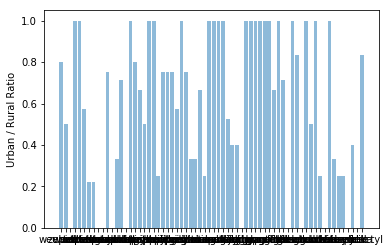

In [232]:
#plot histogram of scraped data urban rural ratio
y_pos = np.arange(66)
plt.bar(y_pos, pokemon_location_guide_df['Urban:Rural'], align = 'center', alpha = 0.5)
plt.xticks(y_pos, pokemon_location_guide_df.index.values)
plt.ylabel('Urban / Rural Ratio')
plt.show()

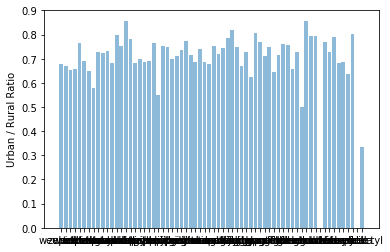

In [233]:
#plot histogram of scraped data urban rural ratio
y_pos = np.arange(66)
plt.bar(y_pos, pokemon_go_location_guide_df['Urban:Rural'], align = 'center', alpha = 0.5)
plt.xticks(y_pos, pokemon_location_guide_df.index.values)
plt.ylabel('Urban / Rural Ratio')
plt.show()

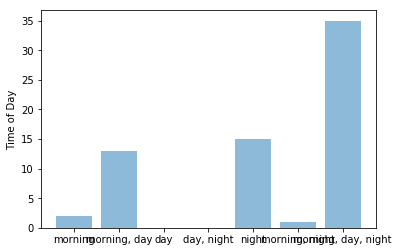

In [249]:
temp = ['morning', 'morning, day', 'day', 'day, night', 'night', 'morning, night', 'morning, day, night']
temp2 = [0, 0, 0, 0, 0, 0, 0]
for i, row in pokemon_location_guide_df.iterrows():
    times = row['Max Appearance Time']
    i = temp.index(times)
    temp2[i]+= 1
    
y_pos = np.arange(7)
plt.bar(y_pos, temp2, align = 'center', alpha = 0.5)
plt.xticks(y_pos, temp)
plt.ylabel('Time of Day')
plt.show()

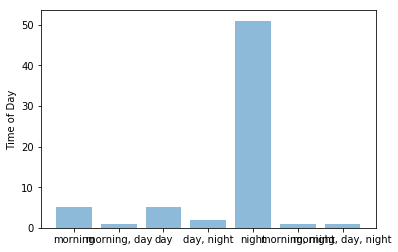

In [250]:
temp = ['morning', 'morning, day', 'day', 'day, night', 'night', 'morning, night', 'morning, day, night']
temp2 = [0, 0, 0, 0, 0, 0, 0]
for i, row in pokemon_go_location_guide_df.iterrows():
    times = row['Times Available']
    i = temp.index(times)
    temp2[i]+= 1
    
y_pos = np.arange(7)
plt.bar(y_pos, temp2, align = 'center', alpha = 0.5)
plt.xticks(y_pos, temp)
plt.ylabel('Time of Day')
plt.show()

Data Analysis and Results

Privacy/Ethics Considerations

Both sets of data we utilized are online and are free to use; Predict'em all is  public dataset on Kaggle and game data from Gold and Silver has been available for decades. No particular restrictions and ethical consequences exist from our comparison of data from two different Pokemon titles within the Pokemon series. There did exist biases within the datasets, as Pokemon were more likely to spawn in urban areas in both Pokemon Go and the Gold and Silver games. Pokemon were also more likely to appear at night in Pokemon Go whereas they appeared most in  in Gold and Silver. Since Pokemon Go is an ongoing game and the Kaggle data was collected from back in August 2016, the spawn rates are likely to have changed over time as they introduce new Pokemon and game features. In contrast, Gold and Silver are games that are nearly 20 years old and thus our analysis and findings are limited to the period of time in which both datasets were created. It is unlikely to hold up over time as Pokemon Go changes.

Conclusions and Discussion

